Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

01.  (5) Загрузите файл HR.csv в pandas dataframe
02. (10) Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
03. (10) Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее
скоррелированные переменные
04.  (5) Рассчитайте сколько сотрудников работает в каждом департаменте
05. (5) Показать распределение сотрудников по зарплатам
06. (5) Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
07. (10) Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
08. (10) Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов
09. (20) Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке
10. (5) Загрузить jupyter notebook с решение на github и прислать ссылку

Итого - максимум 85 баллов
Для зачета необходимо набрать минимум 55

In [3]:
import pandas as pd
df = pd.read_csv('HR.csv', header=0, na_values=["?"])
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
columns_digital_val = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
columns_category = ['Work_accident', 'left', 'promotion_last_5years']

# основные статистики для количественных величин (мин/макс, среднее, мода, медиана, сред.отклонение)
for column in columns_digital_val:
  print('\n*****')
  print(f'Атрибут {column}, количественная величина\n')
  print(f'min {df[column].min()}, max {df[column].max()}, среднее {df[column].mean():.2f}, мода {df[column].mode()[0]}, медиана {df[column].quantile()}, СКО {df[column].std():.2f}')

# основные статистики для категориальных величин (мода, распределение по категориям)
for column in columns_category:
  print('\n*****')
  print(f'Атрибут {column}, категорийная величина \n')
  print('Частоты:')
  print(df[column].value_counts())
  print(f'\nМода: {df[column].mode()[0]}')


*****
Атрибут satisfaction_level, количественная величина

min 0.09, max 1.0, среднее 0.61, мода 0.1, медиана 0.64, СКО 0.25

*****
Атрибут last_evaluation, количественная величина

min 0.36, max 1.0, среднее 0.72, мода 0.55, медиана 0.72, СКО 0.17

*****
Атрибут number_project, количественная величина

min 2, max 7, среднее 3.80, мода 4, медиана 4.0, СКО 1.23

*****
Атрибут average_montly_hours, количественная величина

min 96, max 310, среднее 201.05, мода 135, медиана 200.0, СКО 49.94

*****
Атрибут time_spend_company, количественная величина

min 2, max 10, среднее 3.50, мода 3, медиана 3.0, СКО 1.46

*****
Атрибут Work_accident, категорийная величина 

Частоты:
0    12830
1     2169
Name: Work_accident, dtype: int64

Мода: 0

*****
Атрибут left, категорийная величина 

Частоты:
0    11428
1     3571
Name: left, dtype: int64

Мода: 0

*****
Атрибут promotion_last_5years, категорийная величина 

Частоты:
0    14680
1      319
Name: promotion_last_5years, dtype: int64

Мода: 0


In [4]:
import seaborn as sns

<Axes: xlabel='satisfaction_level', ylabel='Count'>

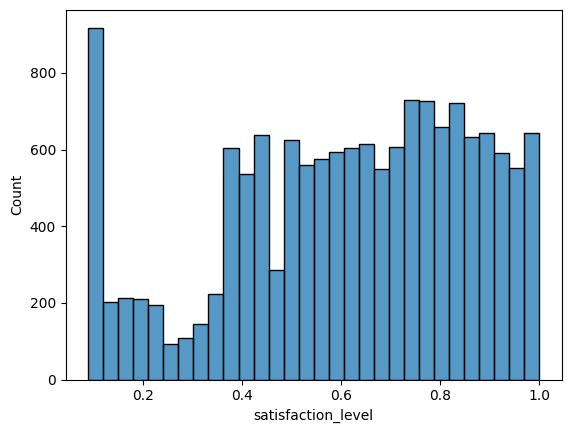

In [4]:
sns.histplot(df['satisfaction_level'])

In [ ]:
# считаем коэф. корреляции Пирсона
df[columns_digital_val].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

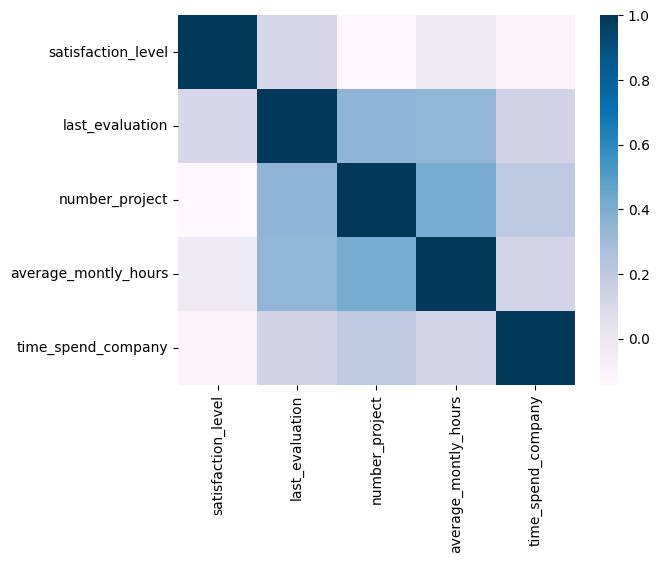

In [ ]:
# Тепловая карта для корреляционных коэффициентов

sns.heatmap(df[columns_digital_val].corr(), cmap='PuBu')

* Две самые скоррелированные переменные: average_montly_hours / number_project
* Две наименее скоррелированные переменные: satisfaction_level / number_project

In [ ]:
print('Количество сотрудников в отделах:')
print(df['department'].value_counts())

Количество сотрудников в отделах:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


[Text(0.5, 1.0, 'Распределение зарплат')]

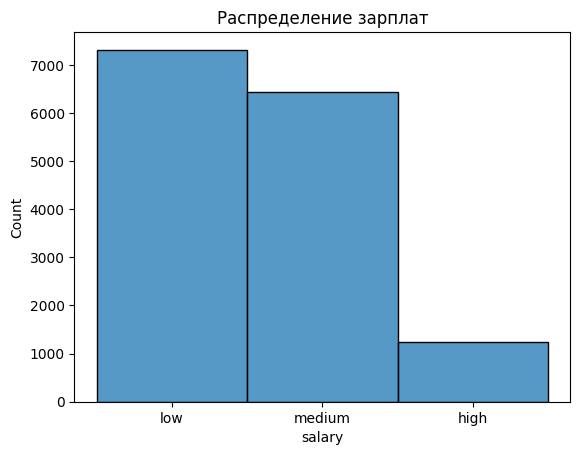

In [ ]:
sns.histplot(df['salary']).set(title='Распределение зарплат')

[Text(0.5, 1.0, 'Распределение зарплат по отделам')]

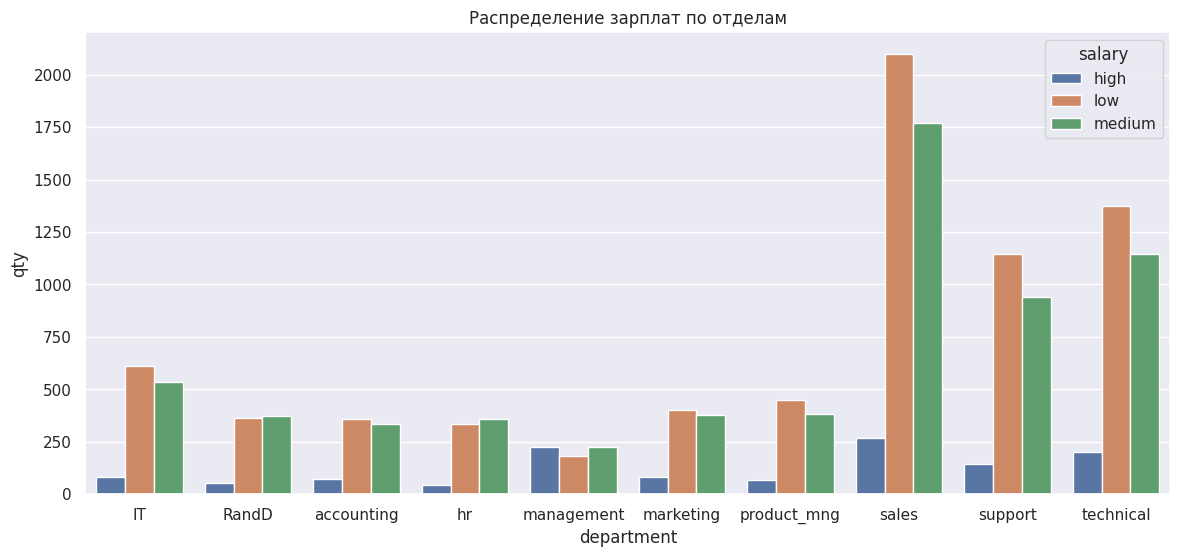

In [ ]:
dep_salary = df.groupby(['department', 'salary']).agg(qty=("salary", 'count'))
dep_salary = dep_salary.reset_index()
sns.set(rc={'figure.figsize':(14,6)})
sns.barplot(x="department",
           y="qty",
           hue="salary",
           data=dep_salary).set(title='Распределение зарплат по отделам')

In [14]:
# Рассчитаем среднее время, которое проводят на работе сотрудники с высоким и средним окладом
df.groupby(['salary']).agg(time=("average_montly_hours", 'mean'))



,time
salary,
high,199.867421
low,200.996583
medium,201.338349


ВЫВОД: гипотеза о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, неверна.

Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [16]:
df.groupby(['left']).agg({'promotion_last_5years': ['mean'], 'satisfaction_level': ['mean'], 'number_project': ['mean']})

,promotion_last_5years,satisfaction_level,number_project
,mean,mean,mean
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


In [15]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


* Разделить данные на тестовую и обучающую выборки
* Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
* Оценить качество модели на тестовой выборке

In [8]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
len(X_test)

3750

In [16]:
lda = LinearDiscriminantAnalysis()

In [25]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [45]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
# рассчитаем точность модели
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test, lda.predict(X_test))

0.7594666666666666

Модель верно предсказывает исход в 75,9% случаев.